# Data wrangling

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv',encoding='windows-1252')

In [3]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None

# Set the maximum number of rows to display
pd.options.display.max_rows = None


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


### checking data type and missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# edit data type for date data 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
# show total null in data 
df.isna().sum().sum()

np.int64(0)

### Data statistical information

In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [11]:
df.describe(include ="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [12]:
#number of duplicated rowes 
df.duplicated().sum()

np.int64(0)

In [13]:
df_cat = df[[ 'Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]

In [14]:
df_cat.head()

,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [15]:
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


In [16]:
df['Order Date'].nunique()

1237

In [17]:
df['Ship Date'].nunique()

1334

# Exploratory Data Analysis - EDA

### What are the top selling products in the superstore?

In [18]:
# grouped the product with selling
product_group = df.groupby('Product Name')['Sales'].sum()
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [19]:
# Sort the data by sales in descending order
top_selling_products = product_group.sort_values(ascending=False)

In [20]:
top_5_selling_products = pd.DataFrame(top_selling_products[:5])


In [21]:
top_5_selling_products


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479


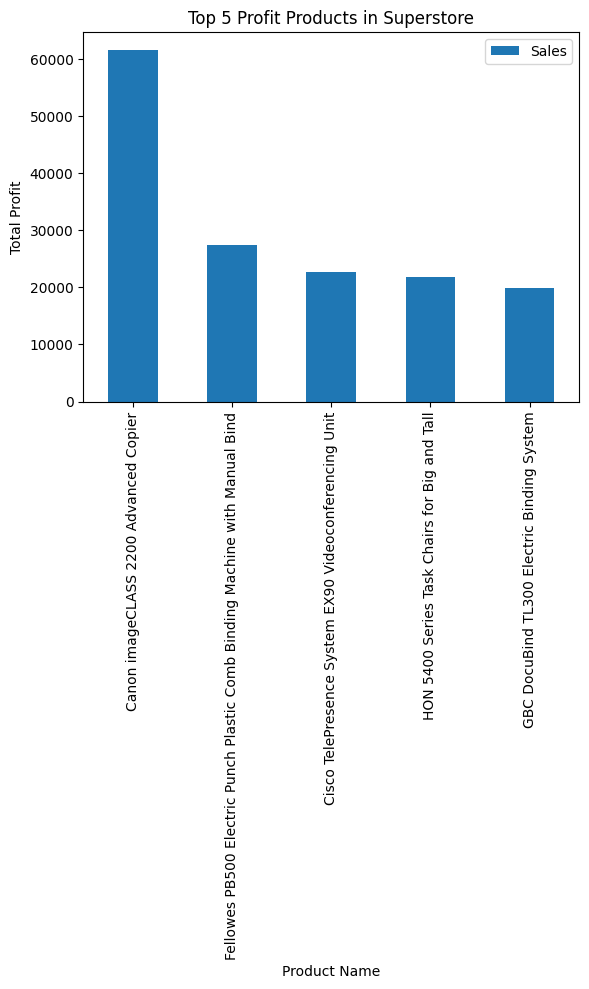

In [22]:
top_5_selling_products.plot(kind="bar")

# Add a title to the plot
plt.title("Top 5 Profit Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")

# Show the plot
plt.show()

###  What are the top selling category in superstore ?

In [23]:
# grouped the category with selling
category_group = df.groupby('Category')['Sales'].sum()
category_group.head()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [24]:
# get the best five category in selling
top_selling_category = category_group.sort_values(ascending = False)
top_selling_category = pd.DataFrame(top_selling_category)
top_selling_category

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


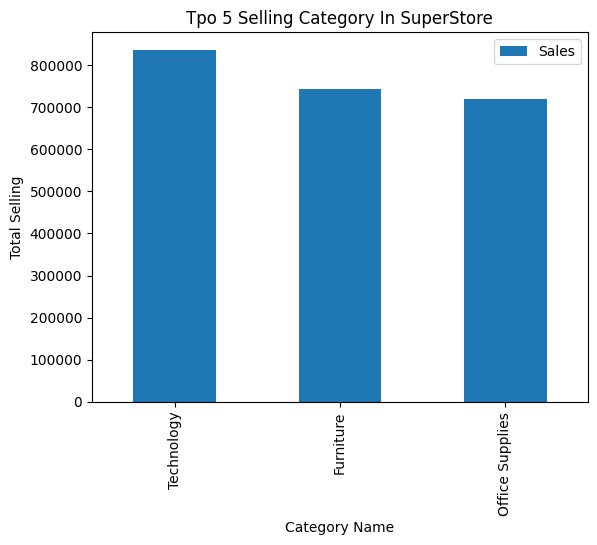

In [25]:
# show it on bar figure
top_selling_category.plot(kind ="bar")
plt.title("Tpo 5 Selling Category In SuperStore")
plt.xlabel('Category Name')
plt.ylabel('Total Selling')
plt.show()

###  What are the top selling sub_category in superstore ?

In [26]:
# grouped the category with selling
sub_category_group = df.groupby('Sub-Category')['Sales'].sum()
sub_category_group.head()

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Name: Sales, dtype: float64

In [27]:
# get the best five category in selling
top_selling_sub_category = sub_category_group.sort_values(ascending = False)
top_selling_sub_category = pd.DataFrame(top_selling_sub_category)
top_selling_sub_category

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


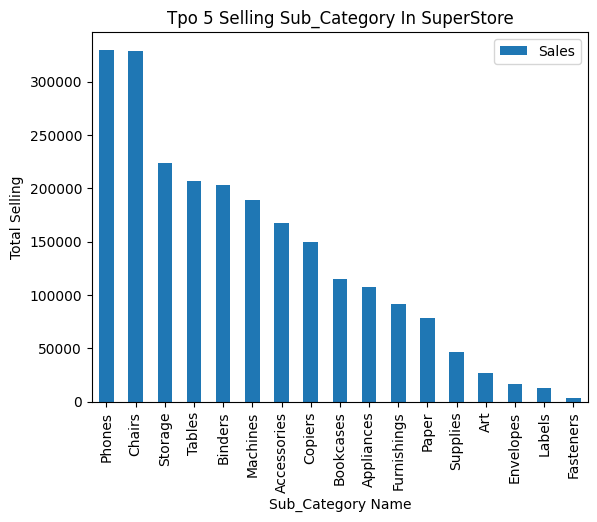

In [28]:
# show it on bar figure
top_selling_sub_category.plot(kind ="bar")
plt.title("Tpo 5 Selling Sub_Category In SuperStore")
plt.xlabel('Sub_Category Name')
plt.ylabel('Total Selling')
plt.show()

### What are the top-profitable products ?

In [29]:
# grouped the product with selling
product_group = df.groupby('Product Name')['Profit'].sum()
product_group.head()

Product Name
"While you Were Out" Message Book, One Form per Page     10.3880
#10 Gummed Flap White Envelopes, 100/Box                 16.7678
#10 Self-Seal White Envelopes                            52.1230
#10 White Business Envelopes,4 1/8 x 9 1/2              223.1408
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 115.2806
Name: Profit, dtype: float64

In [30]:
top_profit_products = product_group.sort_values(ascending=False)

top_5_profit_products =pd.DataFrame(top_profit_products[:5])

top_5_profit_products

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766


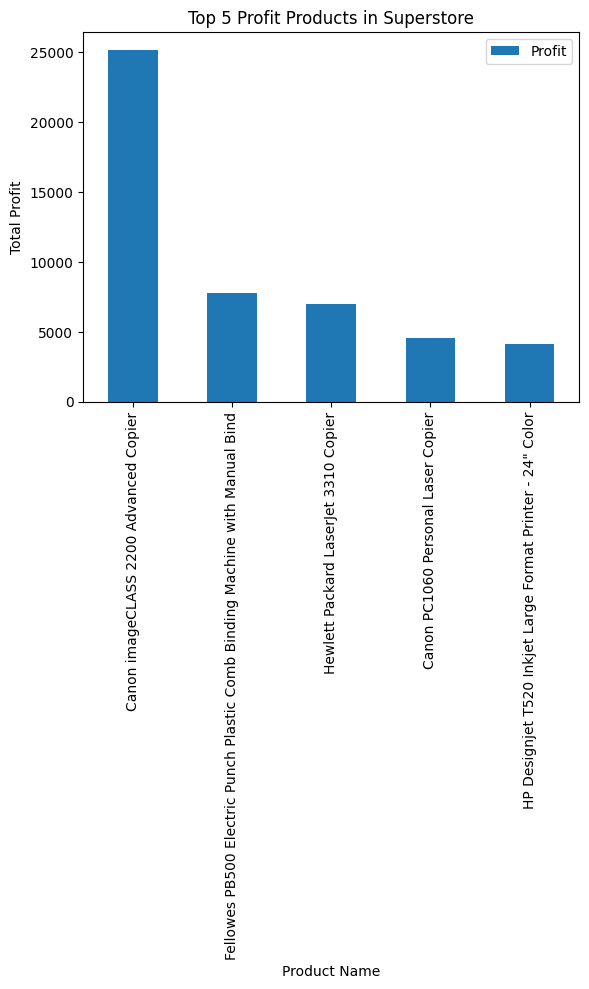

In [31]:
top_5_profit_products.plot(kind="bar")

plt.title("Top 5 Profit Products in Superstore")

plt.xlabel("Product Name")
plt.ylabel("Total Profit")

plt.show()

###  What are the top profit category in superstore ?

In [32]:
# grouped the category with selling
category_group = df.groupby('Category')['Profit'].sum()
category_group.head()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [33]:
# get the best five category in selling
top_profit_category = category_group.sort_values(ascending = False)
top_profit_category = pd.DataFrame(top_profit_category)
top_profit_category

,Profit
Category,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


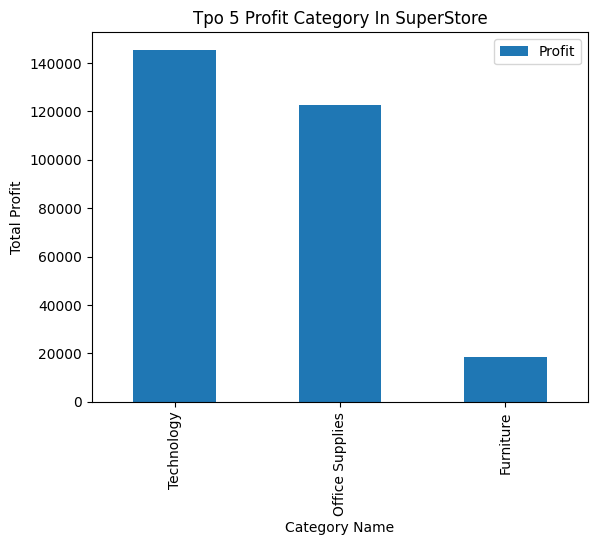

In [34]:
# show it on bar figure
top_profit_category.plot(kind ="bar")
plt.title("Tpo 5 Profit Category In SuperStore")
plt.xlabel('Category Name')
plt.ylabel('Total Profit')
plt.show()

### What are the top profit sub_category in superstore ?

In [35]:
# grouped the category with profit
sub_categories_group = df.groupby('Sub-Category')['Profit'].sum()
sub_categories_group.head()

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Name: Profit, dtype: float64

In [36]:
# get the best five category in profit
top_profit_sub_category = sub_categories_group.sort_values(ascending = False)
top_profit_sub_category = pd.DataFrame(top_profit_sub_category)
top_profit_sub_category

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18138.0054
Furnishings,13059.1436


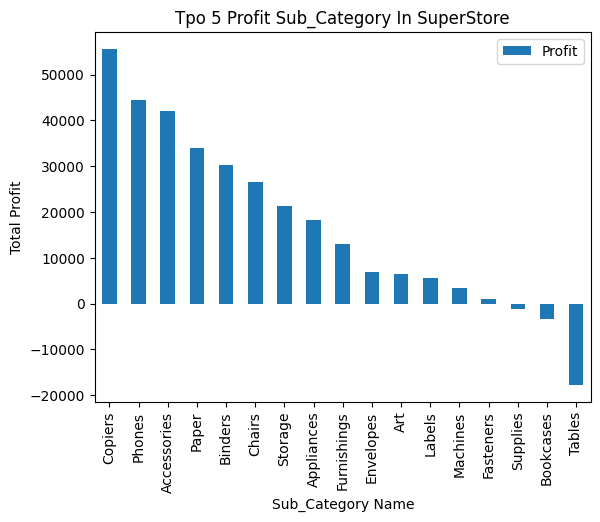

In [37]:
# show it on bar figure
top_profit_sub_category.plot(kind ="bar")
plt.title("Tpo 5 Profit Sub_Category In SuperStore")
plt.xlabel('Sub_Category Name')
plt.ylabel('Total Profit')
plt.show()

### Are the top-selling products the most profitable?

In [38]:
top_5_profit_products.index

Index(['Canon imageCLASS 2200 Advanced Copier',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'Hewlett Packard LaserJet 3310 Copier',
       'Canon PC1060 Personal Laser Copier',
       'HP Designjet T520 Inkjet Large Format Printer - 24" Color'],
      dtype='object', name='Product Name')

In [39]:
top_5_profit_products.index == top_5_selling_products.index

array([ True,  True, False, False, False])

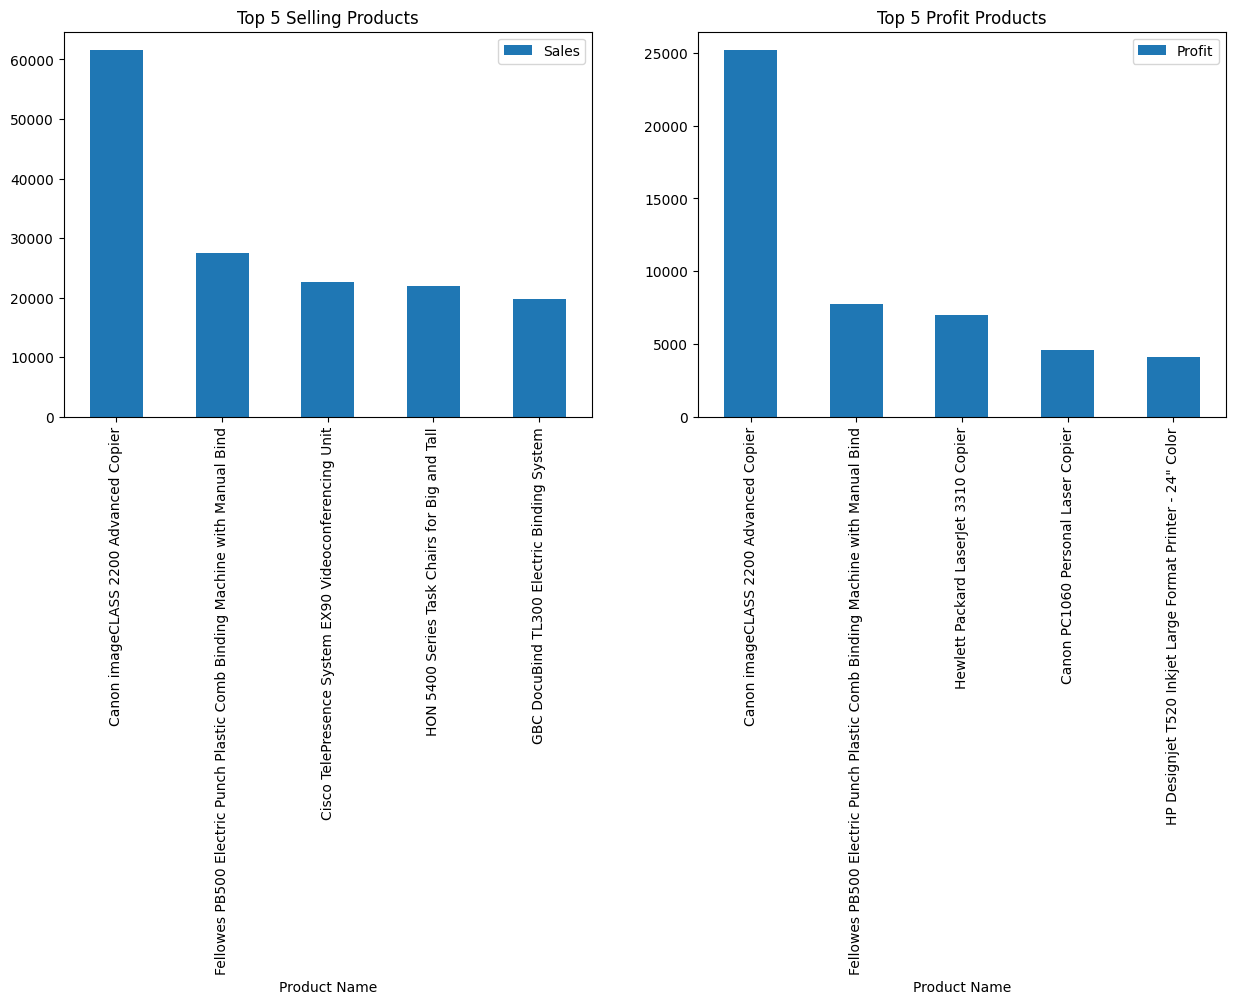

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot the top 5 selling products in the first column
top_5_selling_products.plot(kind="bar", y="Sales", ax=ax1)

# Set the title for the first plot
ax1.set_title("Top 5 Selling Products")

# Plot the top 5 profit products in the second column
top_5_profit_products.plot(kind="bar", y="Profit", ax=ax2)

# Set the title for the second plot
ax2.set_title("Top 5 Profit Products")

# Show the plot
plt.show()


In [41]:
list(top_5_profit_products.index)

['Canon imageCLASS 2200 Advanced Copier',
 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
 'Hewlett Packard LaserJet 3310 Copier',
 'Canon PC1060 Personal Laser Copier',
 'HP Designjet T520 Inkjet Large Format Printer - 24" Color']

## From this step we can conclude that
**top_5_selling_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Cisco TelePresence System EX90 Videoconferencing Unit
- HON 5400 Series Task Chairs for Big and Tall
- GBC DocuBind TL300 Electric Binding System

**top_5_profit_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Hewlett Packard LaserJet 3310 Copier
- Canon PC1060 Personal Laser Copier
- HP Designjet T520 Inkjet Large Format Printer - 24" Color

**The highest selling products, and the most profitable**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


In [42]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

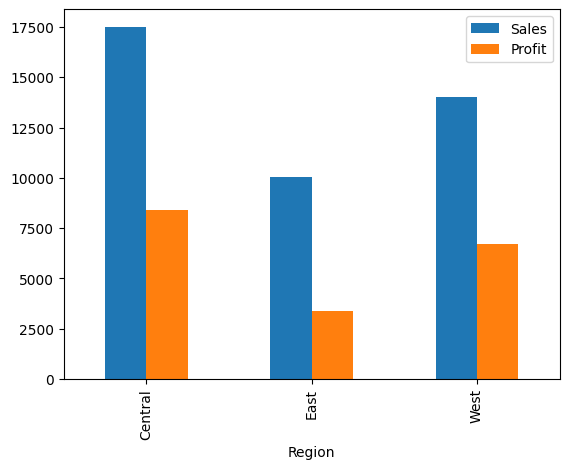

In [43]:
# Filter the data to only include the Canon imageCLASS 2200 Advanced Copier
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

# Group the data by Region
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()

# Ploting
region_group.plot(kind="bar")

plt.show()

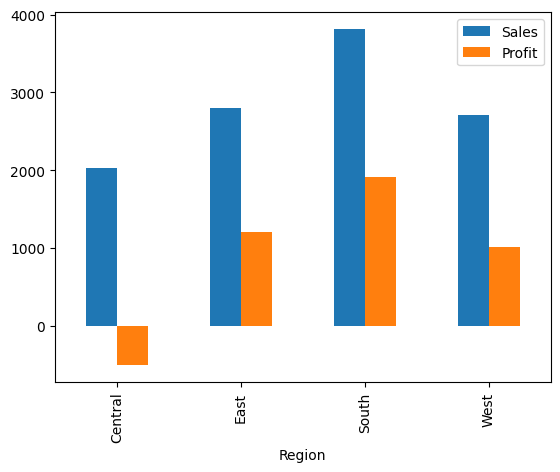

In [44]:
product = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by Region 
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()

# Plot the average sales and profit by region
region_group.plot(kind="bar")

# Show the plot
plt.show()

In [45]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


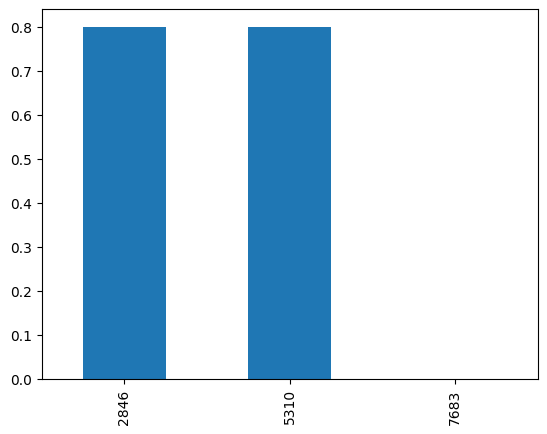

In [46]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in the central region
product["Discount"].plot(kind="bar")

# Show the plot
plt.show()


So from this step we can get that The company loses when it sells its **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** products in the Central! as it make 80% discount on 2 products from 3 products

# What is the sales trend over time (monthly, yearly)?

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

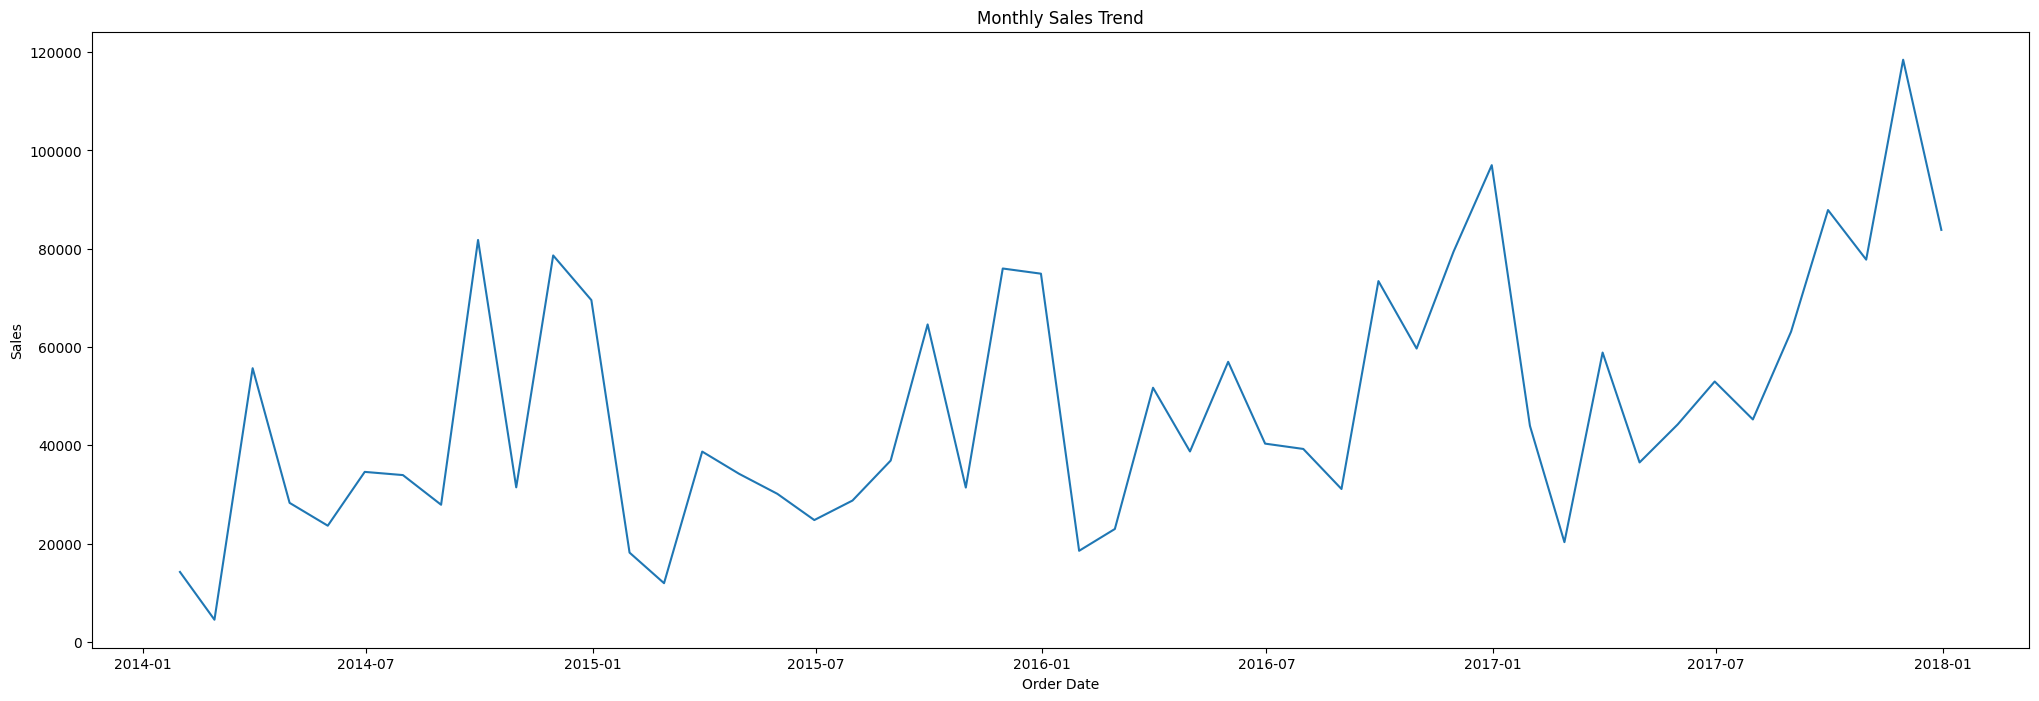

In [48]:
# Group by order_date and sum only the Sales column
monthly_sales = df.groupby(['Order Date'], as_index=False)['Sales'].sum()

# Set the Order Date column as the index of the dataframe
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals and sum the sales
monthly_sales = monthly_sales.resample('M').sum() # M for month

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()

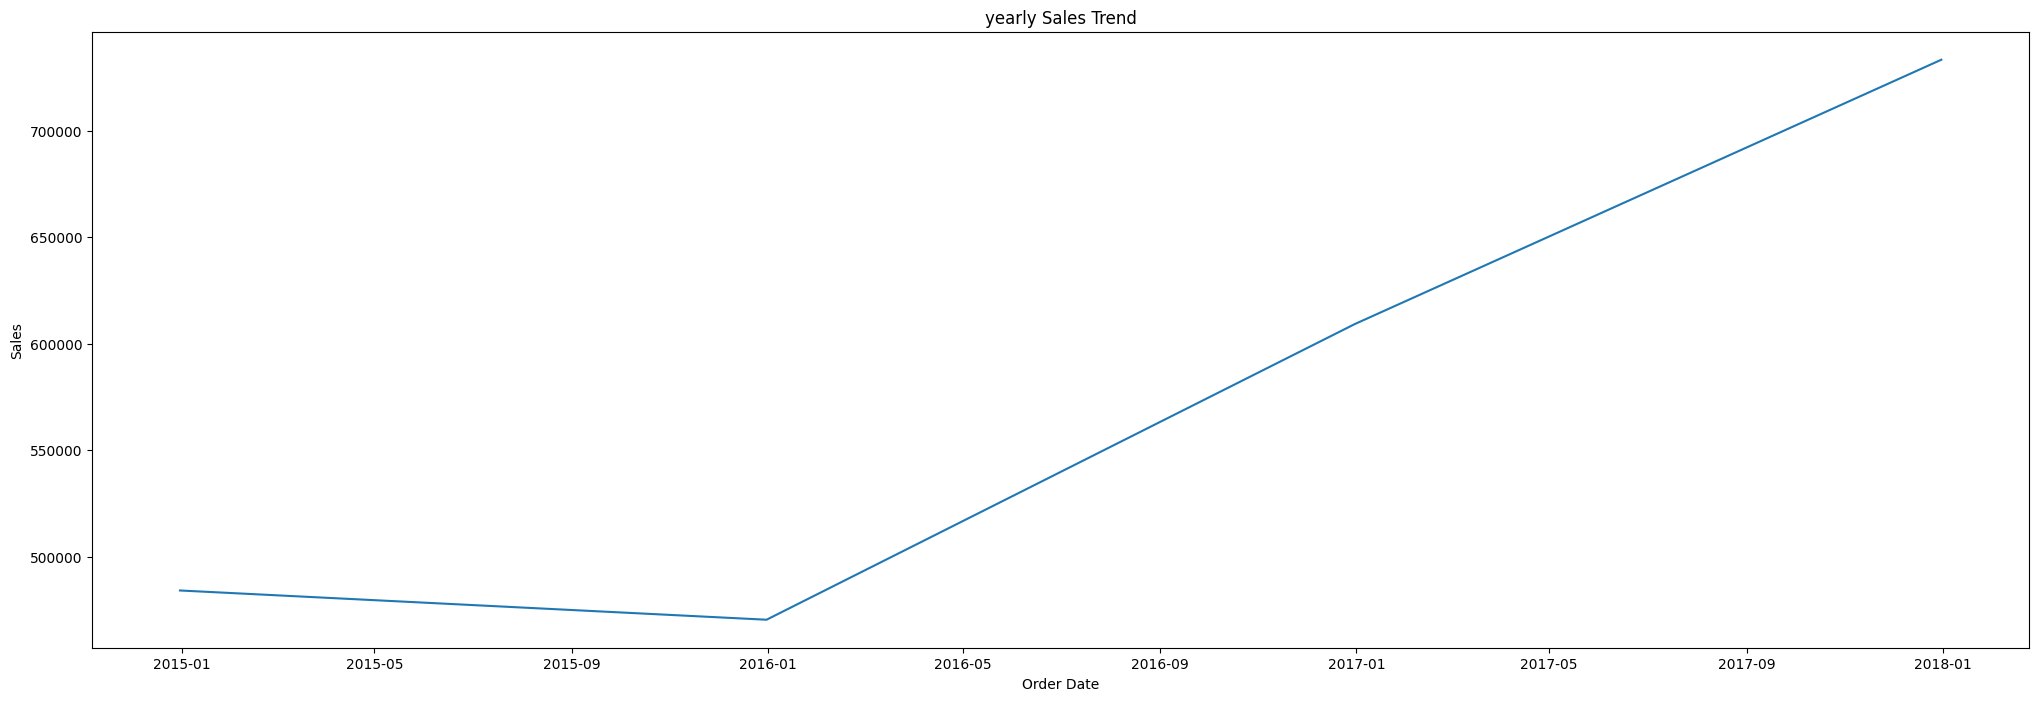

In [49]:
yearly_sales = monthly_sales.resample('Y').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()

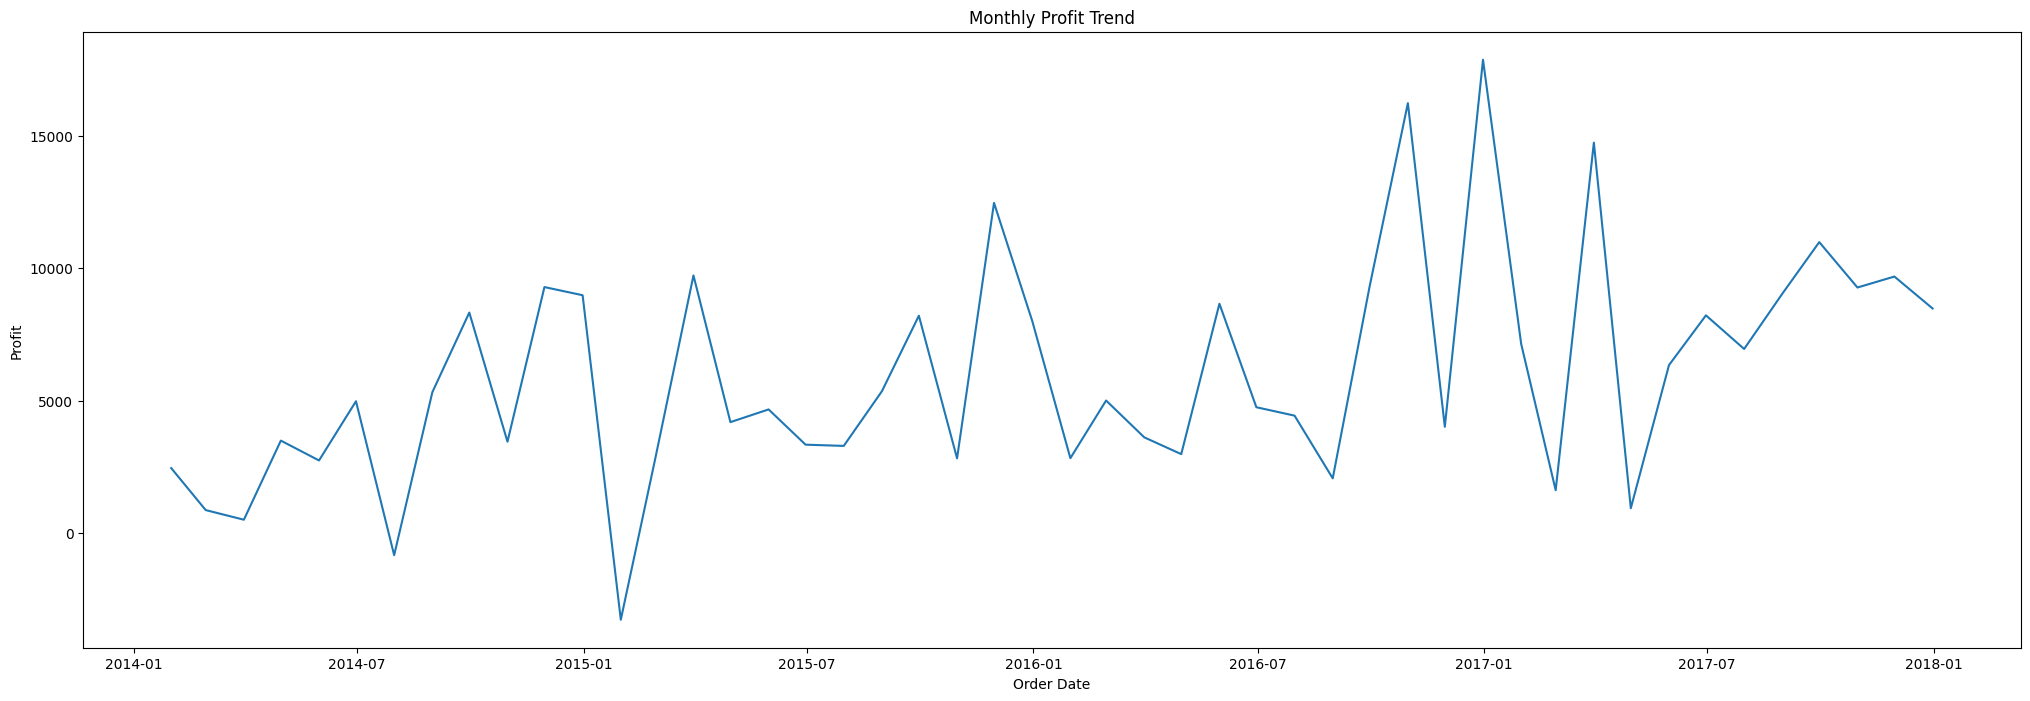

In [50]:
monthly_sales = df.groupby(['Order Date'], as_index=False)["Profit"].sum()

# Set the Order Date column as the index of the dataframe
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('M').sum() # M for month

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.show()

**The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts**

In [51]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')

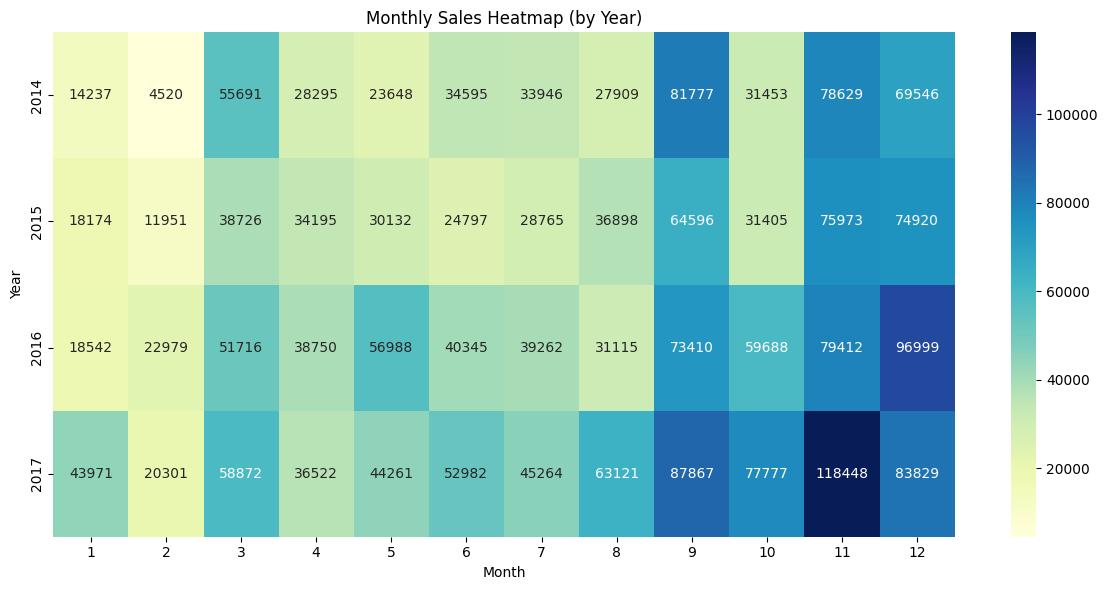

In [52]:
monthly_pivot = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Sales Heatmap (by Year)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Which region and place make the most sales ?

In [53]:
df_places = df[['Country','City','State','Region']]

In [54]:
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [55]:
for place in df_places.columns:
    print(place,':',df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [56]:
df_places = df[['City','State','Region','Sales','Profit']]

In [57]:
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


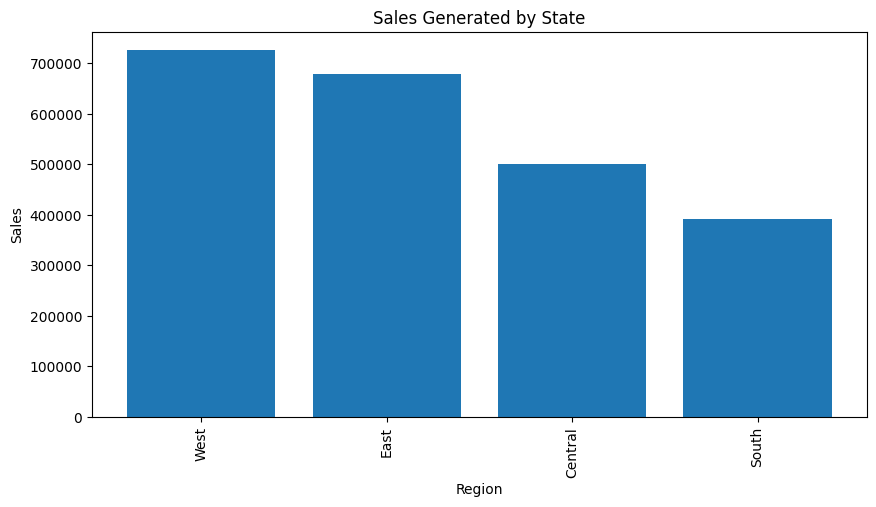

In [58]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


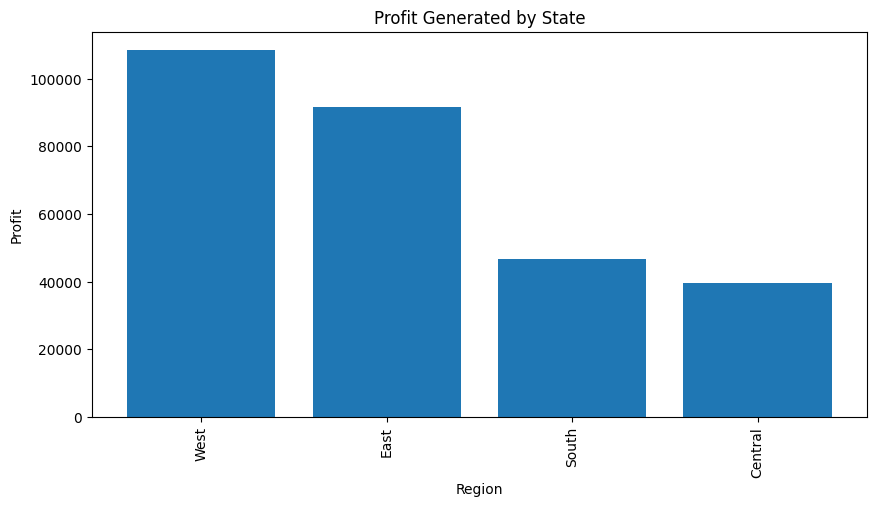

In [59]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()


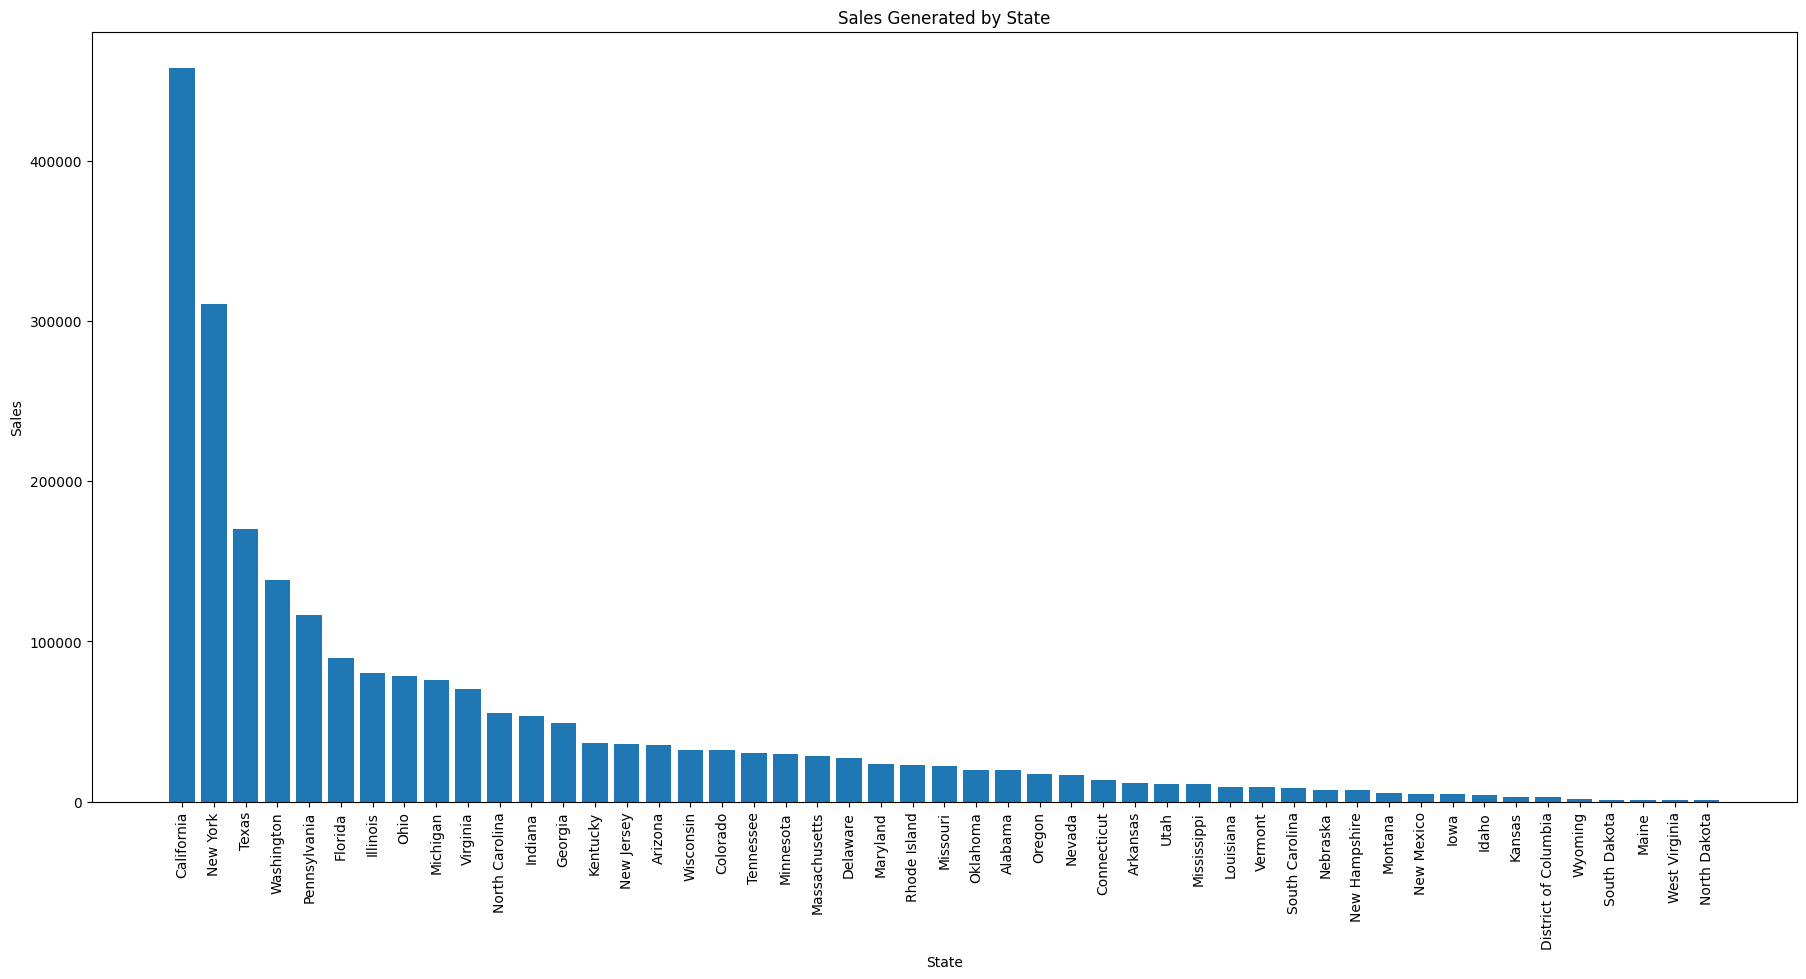

In [60]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()


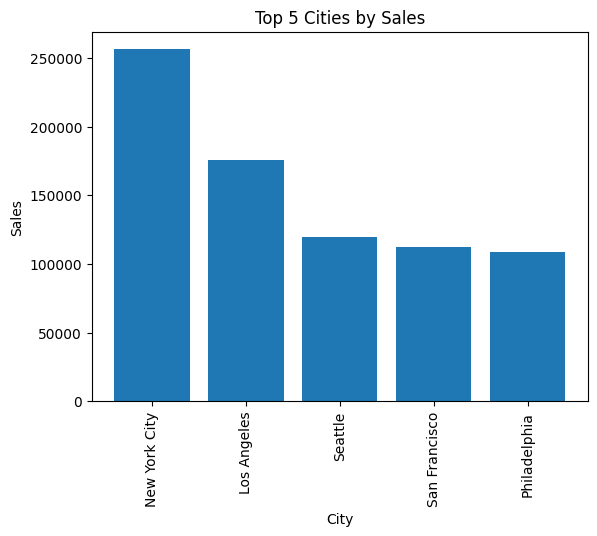

In [61]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()


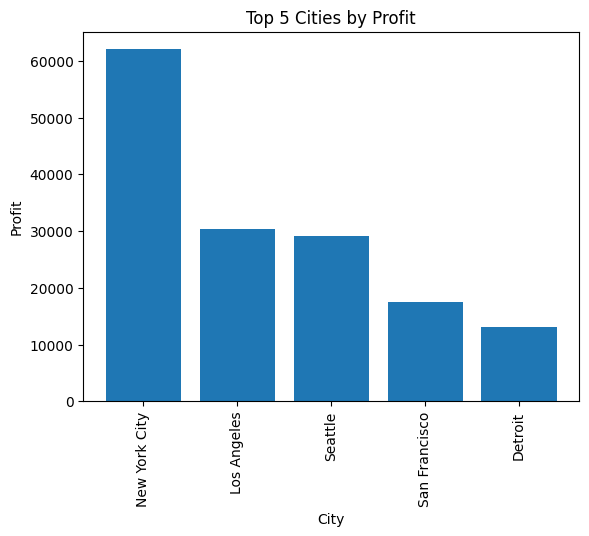

In [62]:
grouped_data = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data.head()

plt.bar(top_5_cities['City'], top_5_cities['Profit'], align='center')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 5 Cities by Profit")
plt.xticks(rotation=90)

plt.show()


In [63]:
top_5_cities.City

329    New York City
266      Los Angeles
452          Seattle
438    San Francisco
123          Detroit
Name: City, dtype: object

## So we can see that the top placies are :
**Cities**: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State** : [california, New York]

**Region** : [West]

# What is the impact of discounts on sales?


In [64]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

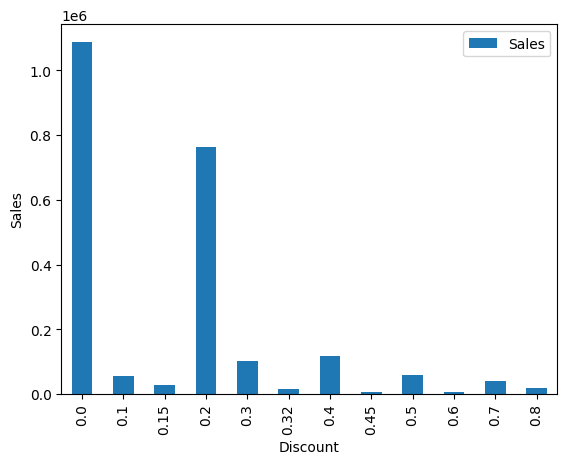

In [65]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby("Discount")[["Sales"]].sum()

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Sales")

plt.show()

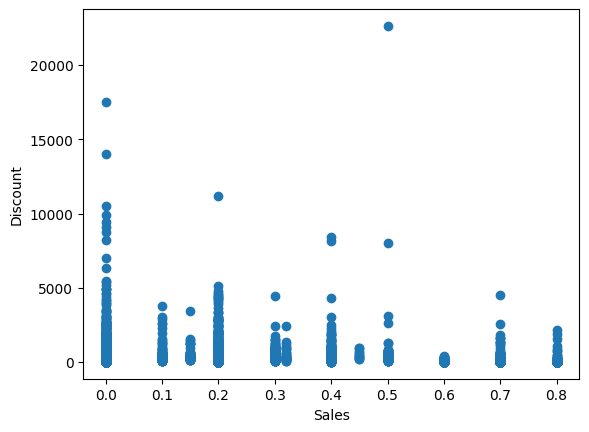

In [66]:
# Create a scatter plot between sales and discounts
plt.scatter(df['Discount'], df['Sales'])

plt.ylabel("Discount")
plt.xlabel("Sales")
plt.show()

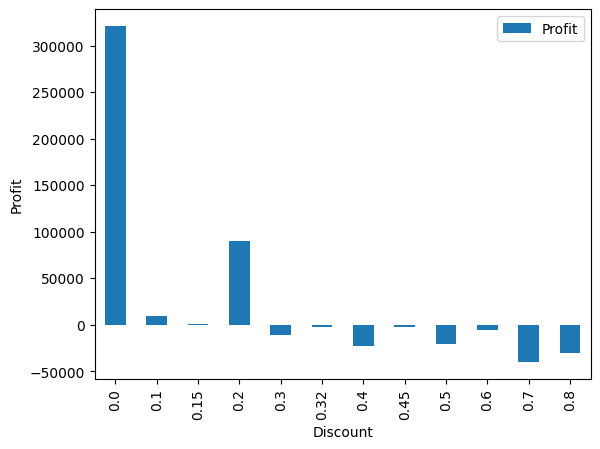

In [67]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby(["Discount"])[["Profit"]].sum()

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()

In [68]:
# Calculate the ..th percentile of sales
sales_90th_percentile = df['Sales'].quantile(0.90)

# Filter the data to show only the values greater than ..% in sales
df_90 = df[df['Sales'] > sales_90th_percentile]




In [69]:
sales_90th_percentile


np.float64(572.7060000000001)

In [70]:
df_90.shape

(1000, 24)

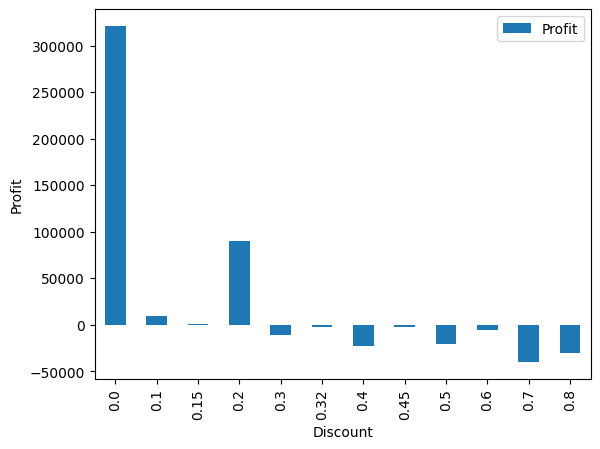

In [71]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby(["Discount"])[["Profit"]].sum()

# Plot the average sales by discount
ax = discount_group.plot(kind="bar")

# Set the y-axis label to "Sales"
ax.set_ylabel("Profit")

# Show the plot
plt.show()


In [72]:
df.shape

(9994, 24)

# From the last step we can see that 

The best sales are when the discount is 50%, but this leads to loss and non-profitability.

The discount from 10 to 20%. Is the best solution, as they are the second and third best sellers and make profits

In [73]:
# Group the data by product category and calculate the average profit for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit'].mean()

print(avg_profit_margin_by_category)

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


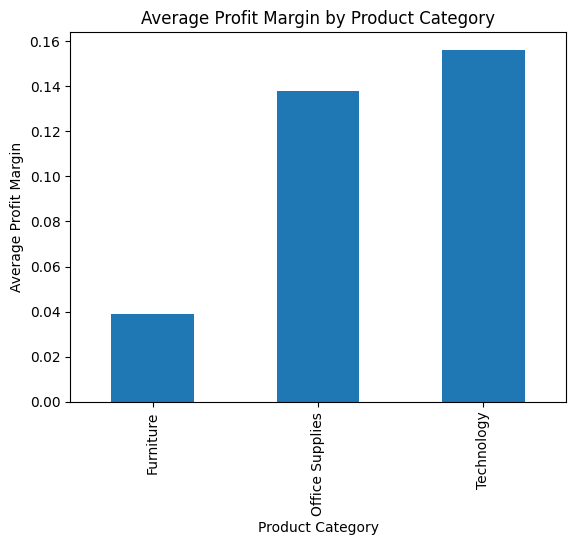

In [74]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean()

# Plot the average profit margin for each category as a bar chart
avg_profit_margin_by_category.plot(kind='bar')

# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()


# Who are our Customers ?

In [75]:
df.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [76]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [77]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')

In [78]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


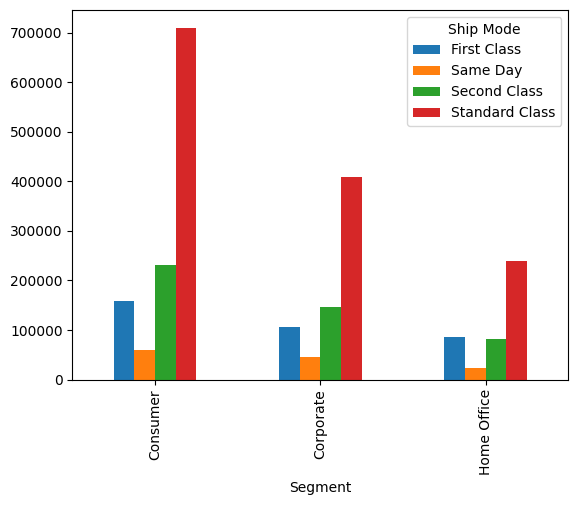

In [79]:
# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)

plt.show()

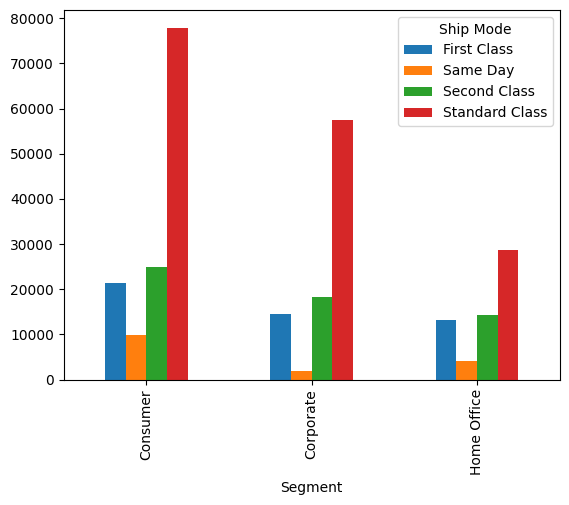

In [80]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=False)

# Show the plot
plt.show()

### So most of the sales and profits come from (*Consumers*) who use (*standard-class*) shipping mode 